_LEARNING-CIRCLE-24 PROJECT_

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2> Learning-Circle-24 </h2> <p>  Contributors </p>



# **Crime in Chicago**
This is a dataset
The data dictionary can be found in [Chicago Crime Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data)

In this notebook, we are going to explore more about crime in Chicago and try to answer few questions:

How has crime in Chicago changed across years? What year was really the bloodiest year in two decades?
Are some types of crimes more likely to happen in specific locations or specific time of the day or specific day of the week than other types of crimes?

Analyzing the Chicago crime dataset involves examining various aspects of the data to understand patterns, trends, and characteristics of criminal activities in Chicago. We perform analysis using Python, pandas and visualization libraries using the following steps:

1. Load the Dataset: Load the Chicago crime dataset into a DataFrame.
2. Explore the Dataset: Examine the structure, columns, and basic statistics of the dataset.
3. Data Cleaning: We dropped redundant columns and handle missing values.
4. Feature Engineering: Create new column for Months, Day, Season
5. EDA: Exploratory Data Analysis
    - How has crime in Chicago changed across years? Was 2023 really the bloodiest year in two decades?
    - Are some types of crimes more likely to happen in specific locations or specific time of the day or specific day of the         week than other types of crimes?
    - In which month did the lowest motor vehicle thefts occur?
    - How prominant are certain types of various crimes?
    - How do rates of crime change of time? For instance, are there any seasonal effects or changes depending on the time of         day?
    - Where do these crimes occur? Are some areas more safe than others?
    -
6. Frequency distribution of Crimes: show how the frequency of crime is distributed within Months, Days, Seasons.
7. Visualize Data Distribution: Visualize the distribution of variables using histograms, box plots, or density plots.
8. Investigate Relationships: Look for relationships between variables using scatter plots, correlation matrices, or pair plots
9. Investigate Crime Types: Analyze the distribution of different types of crimes.
10. Examine Crime Locations: Investigate the distribution of crimes across different locations.
11. Identify Hotspots: Identify areas with high crime rates.
12. Detect Seasonal Patterns: Look for seasonal patterns or variations in crime rates.
13. Compare Crime Rates: Compare crime rates across different categories such as day of the week, time of day, and month.
14. Summarize and Visualize Insights: Summarize and Visualize the key insights and findings from the analysis using plots and charts.

In [ ]:
# importing required libraries
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Set display option
pd.set_option('display.max.columns', None)

# 1. Loading the dataset

In [5]:
# Load the dataset
chicago_crime_df= pd.read_csv('/content/drive/MyDrive/datasets/Crimes_-_2001_to_Present_20240323.csv')

# 2. Explore the dataset

In [6]:
#checking the dimension of the dataset
chicago_crime_df.shape

(8023397, 22)

In [7]:
# Display the first five rows of the dataset
chicago_crime_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [8]:
# check the first five observations
chicago_crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25.0,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,22.0,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [9]:
 # Display column information and data types
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8023397 entries, 0 to 8023396
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [10]:
# checking missing value count
chicago_crime_df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     12766
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614853
Community Area          613478
FBI Code                     0
X Coordinate             88365
Y Coordinate             88365
Year                         0
Updated On                   0
Latitude                 88365
Longitude                88365
Location                 88365
dtype: int64

In [11]:
chicago_crime_df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,8.023397e+06,8.023397e+06,8.023350e+06,7.408544e+06,7.409919e+06,7.935032e+06,7.935032e+06,8.023397e+06,7.935032e+06,7.935032e+06
mean,7.209858e+06,1.185132e+03,1.129679e+01,2.276600e+01,3.744103e+01,1.164616e+06,1.885834e+06,2.010337e+03,4.184232e+01,-8.767144e+01
std,3.607435e+06,7.034600e+02,6.957841e+00,1.385439e+01,2.154392e+01,1.698763e+04,3.247645e+04,6.563573e+00,8.935600e-02,6.154686e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.881785e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153006e+06,1.859114e+06,2.005000e+03,4.176878e+01,-8.771355e+01
50%,7.205746e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166145e+06,1.890802e+06,2.009000e+03,4.185609e+01,-8.766575e+01
75%,1.043308e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176389e+06,1.909343e+06,2.016000e+03,4.190692e+01,-8.762813e+01
max,1.340600e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.024000e+03,4.202291e+01,-8.752453e+01


# 3. Data Preprocessing

## Data Cleaning

Here are some steps that we would carry out in this phase

1. Convert data types to the appropriate formats
2. Remove redundant or unnecessary columns
3. Handle missing values

__Reasons for dropping the below columns__
- 'Unnamed: 0': Its just an index for individual row
- 'ID': Serial identifier for the record which is redundant due to the presence of a case number for each case.
- 'Location': This is where the incident occurred in a format that allows for creation of maps and other geographic operation. It's the combination of both latitude and longitude feature of this dataset thus, not required.
- 'Updated On': Holds the date and time the record was last updated.Which is not required for our analysis.
- 'X Coordinate': The x coordinate is a shifted location from the actual location for partial redaction but falls on the same block. Since we have a longitude/latitude and the block where the crime happened, we can neglect this feature.
- 'Y Coordinate': The y coordinate is a shifted location from the actual location for partial redaction but falls on the same block. Since we have a longitude/latitude and the block where the crime happened, we can neglect this feature.
- 'Community Area': This indicates the community area where the incident occurred. Which is not neccessary for our analysis.
- 'IUCR': This is the Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description, it provides information about the primary type and description of crime. Since primary type and description features already exist, it becomes a redundant column
- Description: It's simply a subcategory of the primary type(which describes the type of crime committed). this can be omitted
- Block: Since we have the latitude and longitude, this column is redundant.
- Community Area: This is not needed in our analysis and the presence of a police Beat makes this redundant.
- FBI Code: Removed because it is not necessary for our analysis as we are unable to de-code these codes.

__1. convert inappropriate data types to the correct one__

In [ ]:
# first we convert the date column to datetime data type.

# chicago_crime_df['Date'] = pd.to_datetime(chicago_crime_df['Date'],format = "%m/%d/%Y %I:%M:%S %p")

In [12]:
# convert the district column to a string; from the keynote, Chicago police has only 22 district and the data type is plain text

chicago_crime_df['District'] = pd.Series(chicago_crime_df['District'], dtype='string')

__2. Use a funtion to Drop redundant columns and/or columns that are not necessary for our analysis (a redundant column is one that gives infomation that another column already explains: eg ID and Case number)__

In [13]:
chicago_crime_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [15]:
# Dropping redundant columns
def drop_redundant_columns(df):
    redundant_columns = ['ID', 'Location','Updated On', 'FBI Code', 'Block', 'Description', 'X Coordinate','Y Coordinate','Community Area','IUCR']
    df.drop(redundant_columns, axis=1, inplace= True)

drop_redundant_columns(chicago_crime_df)

In [16]:
chicago_crime_df.head()

,Case Number,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
0,JA371270,03/18/2015 12:00:00 PM,DECEPTIVE PRACTICE,BANK,False,False,111,1.0,42.0,2015,NaN,NaN
1,JC213749,12/20/2018 03:00:00 PM,DECEPTIVE PRACTICE,APARTMENT,False,False,2515,25.0,36.0,2018,NaN,NaN
2,JC212333,05/01/2016 12:25:00 AM,DECEPTIVE PRACTICE,NaN,False,False,824,8.0,15.0,2016,NaN,NaN
3,JC211511,12/20/2018 04:00:00 PM,OTHER OFFENSE,RESIDENCE,False,False,1724,17.0,33.0,2018,NaN,NaN
4,JC212935,06/01/2014 12:01:00 AM,DECEPTIVE PRACTICE,RESIDENCE,False,False,2222,22.0,21.0,2014,NaN,NaN


In [17]:
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8023397 entries, 0 to 8023396
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   Primary Type          object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              string 
 8   Ward                  float64
 9   Year                  int64  
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(3), int64(2), object(4), string(1)
memory usage: 627.4+ MB


In [18]:
# A summary statistics of each column
chicago_crime_df.describe(include='all')

,Case Number,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
count,8023397,8023397,8023397,8010631,8023397,8023397,8.023397e+06,8023350,7.408544e+06,8.023397e+06,7.935032e+06,7.935032e+06
unique,8022834,3321085,36,217,2,2,NaN,24,NaN,NaN,NaN,NaN
top,HJ590004,01/01/2008 12:01:00 AM,THEFT,STREET,False,False,NaN,8.0,NaN,NaN,NaN,NaN
freq,6,305,1694801,2095702,5958722,6644238,NaN,538733,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.185132e+03,NaN,2.276600e+01,2.010337e+03,4.184232e+01,-8.767144e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,7.034600e+02,NaN,1.385439e+01,6.563573e+00,8.935600e-02,6.154686e-02
min,NaN,NaN,NaN,NaN,NaN,NaN,1.110000e+02,NaN,1.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.210000e+02,NaN,1.000000e+01,2.005000e+03,4.176878e+01,-8.771355e+01
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.034000e+03,NaN,2.300000e+01,2.009000e+03,4.185609e+01,-8.766575e+01
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.731000e+03,NaN,3.400000e+01,2.016000e+03,4.190692e+01,-8.762813e+01


In [19]:
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8023397 entries, 0 to 8023396
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   Primary Type          object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              string 
 8   Ward                  float64
 9   Year                  int64  
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(3), int64(2), object(4), string(1)
memory usage: 627.4+ MB


__3. Handling missing values__

In [20]:
# checking missing value count
chicago_crime_df.isnull().sum()

Case Number                  0
Date                         0
Primary Type                 0
Location Description     12766
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614853
Year                         0
Latitude                 88365
Longitude                88365
dtype: int64

In [21]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [22]:
missing_values_table(chicago_crime_df)

Your selected dataframe has 12 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Ward,614853,7.7
Latitude,88365,1.1
Longitude,88365,1.1
Location Description,12766,0.2
District,47,0.0


- __Handling Missing Case Number__

We have one (1) missing Case Number in the entire dataset. We have decided to drop the row where Case Number is missing

In [23]:
# dropping the missing Case Number column null value
chicago_crime_df.dropna(subset=['Case Number'],inplace=True) # i chose to drop this because the percentage NA is insignificant

In [24]:
chicago_crime_df.isna().sum()

Case Number                  0
Date                         0
Primary Type                 0
Location Description     12766
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614853
Year                         0
Latitude                 88365
Longitude                88365
dtype: int64

- __Handling Missing values for the District Column__

We have just 12 missing value for the district column which is 0.0% of the entire dataset. We have decided to drop the row where location discription is missing.

In [25]:
# dropping the missing district column null value
chicago_crime_df.dropna(subset=['District'],inplace=True) # i chose to drop this because the percentage NA is insignificant

In [26]:
chicago_crime_df.District.unique()

<StringArray>
[ '1.0', '25.0',  '8.0', '17.0', '22.0',  '6.0', '15.0', '19.0',  '2.0',
  '9.0',  '4.0',  '7.0', '12.0', '16.0', '18.0',  '3.0', '10.0', '11.0',
 '14.0', '24.0',  '5.0', '20.0', '31.0', '21.0']
Length: 24, dtype: string

In [27]:
chicago_crime_df.isna().sum()

Case Number                  0
Date                         0
Primary Type                 0
Location Description     12766
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    614853
Year                         0
Latitude                 88365
Longitude                88365
dtype: int64

- __Handling Missing values for the ward Column (Using data imputation)__

In [28]:
missing_values_table(chicago_crime_df)

Your selected dataframe has 12 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Ward,614853,7.7
Latitude,88365,1.1
Longitude,88365,1.1
Location Description,12766,0.2


In [29]:
# checking the unique values of the ward column
chicago_crime_df.Ward.unique()

array([42., 36., 15., 33., 21.,  8., 30.,  6., 23., 29., 44.,  3., 11.,
        7., 16., nan,  1., 45., 27., 39., 43., 37., 20., 24.,  9.,  2.,
       49., 22., 17., 28.,  5., 19., 34., 50.,  4., 10., 14., 46., 26.,
       47., 41., 40., 32., 38., 18., 25., 13., 31., 35., 48., 12.])

In [30]:
chicago_crime_df.Ward

0          42.0
1          36.0
2          15.0
3          33.0
4          21.0
           ... 
8023392    17.0
8023393     9.0
8023394    24.0
8023395    50.0
8023396    44.0
Name: Ward, Length: 8023350, dtype: float64

In [31]:
# Using ffill(forward fill) to fill missing value in the ward column
chicago_crime_df.Ward = chicago_crime_df.Ward.ffill() # Last observed value is carried forward

In [32]:
chicago_crime_df.isna().sum()

Case Number                 0
Date                        0
Primary Type                0
Location Description    12766
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Year                        0
Latitude                88365
Longitude               88365
dtype: int64

- __Handling Missing values for the latitude and Longitude Column__ (Using Assosciation) <br>
    - The assumption here is that the latitude and longitude readings are points that show exact location, are closer to eachother within a district. if they are, we can group our data by districts and fill up missing Latitide and longitude values by the median or mode.

In [33]:
chicago_crime_df.groupby(['District', 'Longitude', 'Latitude']).size()

District  Longitude   Latitude 
1.0       -91.686566  36.619446    7
          -87.843494  41.987405    1
          -87.776059  41.933944    1
          -87.761374  41.924040    1
          -87.683765  41.783757    1
                                  ..
9.0       -87.614200  41.831200    1
          -87.613592  41.823878    1
          -87.613504  41.823880    4
          -87.603444  41.825128    1
          -87.602820  41.813217    1
Length: 903879, dtype: int64

There appears to be closeness in longitude and Latitude points when data is grouped based on districts, we can group based on district and fill up by taking the median.

In [34]:
chicago_crime_df['Latitude'] = chicago_crime_df.groupby('District')['Latitude'].transform(lambda x: x.fillna(x.median()))
chicago_crime_df['Longitude'] = chicago_crime_df.groupby('District')['Longitude'].transform(lambda x: x.fillna(x.median()))

In [35]:
chicago_crime_df.isna().sum()

Case Number                 0
Date                        0
Primary Type                0
Location Description    12766
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Year                        0
Latitude                    0
Longitude                   0
dtype: int64

- __Handling Missing values for the Location Description__

We have just 2877 missing value for the location description which is 0.1% of the entire dataset. We can decide to drop the row where location decription is missing or fill this row with the most crime location.

In [37]:
chicago_crime_df.groupby(['District','Location Description']).size()

District  Location Description                                 
1.0       ABANDONED BUILDING                                         75
          AIRCRAFT                                                    1
          AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA             1
          AIRPORT BUILDING NON-TERMINAL - SECURE AREA                 1
          AIRPORT PARKING LOT                                         3
                                                                   ... 
9.0       VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)      11
          VEHICLE NON-COMMERCIAL                                   5819
          VEHICLE-COMMERCIAL                                        311
          WAREHOUSE                                                1330
          YARD                                                       16
Length: 3377, dtype: int64

In [38]:
# dropping the missing location description index row
chicago_crime_df.dropna(subset=['Location Description'],inplace=True)

In [39]:
chicago_crime_df.isna().sum()

Case Number             0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Year                    0
Latitude                0
Longitude               0
dtype: int64

# 4. EDA: Data Exploration

In [40]:
# create a copy of the dataframe to avoid conflict
c_crime_df = chicago_crime_df.copy()

1. Total Number of cases

In [41]:
# Number of Unique Case Number.

print(f"Out of {len(c_crime_df)}: {len(c_crime_df['Case Number'].unique())} are unique case numbers")

Out of 8010584: 8010021 are unique case numbers


Observation: Most case numbers are unique case numbers.

Number of Non-Unique cases

In [42]:
# Out of all cases , how many are non_unique cases ?

non_unique_case_number = c_crime_df[c_crime_df.duplicated('Case Number') | c_crime_df.duplicated('Case Number', keep=False)]['Case Number'].tolist()

print(f"Length of non_unique: {len(non_unique_case_number)} out of {len(c_crime_df)}")

Length of non_unique: 1033 out of 8010584


In [43]:
non_unique_case_number_df = c_crime_df[c_crime_df.duplicated('Case Number', keep=False)]
non_unique_case_number_df.head() # Saving non_unique case number dataframe for future use.

,Case Number,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
109389,JG446325,10/01/2023 02:25:00 PM,HOMICIDE,STREET,False,False,1124,11.0,28.0,2023,41.880356,-87.702033
109901,JG446325,10/01/2023 03:43:00 PM,HOMICIDE,STREET,False,False,1124,11.0,28.0,2023,41.880356,-87.702033
123912,JG453003,10/06/2023 02:41:00 AM,HOMICIDE,APARTMENT,False,True,932,9.0,16.0,2023,41.795815,-87.671152
124102,JG453003,10/06/2023 02:40:00 AM,HOMICIDE,APARTMENT,False,True,932,9.0,16.0,2023,41.795815,-87.671152
126144,JG456963,10/09/2023 03:02:00 PM,HOMICIDE,RETAIL STORE,False,False,714,7.0,16.0,2023,41.780352,-87.664242


Observation: There are 2275789 unique values of case number out of 2275836 , it means there are 2275789 cases registered with a single crime the rest 92 are the case numbers which have commited multiple crimes.

2. Top 10 - Number of cases each day

In [44]:
# Function to convert Date from "DD/MM/YYYY HH:MM:SS" to "DD/MM/YYYY"

def date_column(df) :
    date_list = []
    for i in df['Date'] :
        date_spliter = i.split()[0]
        date_list.append(date_spliter)
    return date_list
date_column(c_crime_df)


c_crime_df['date'] = date_column(c_crime_df)

In [45]:
# Top 10 - Number of cases each day?

top_10_num_of_cases_each_day = c_crime_df.groupby(['date'])['Case Number'].count().reset_index(name = 'no_of_cases').set_index('no_of_cases').sort_index(ascending = False)[:10]
top_10_num_of_cases_each_day

,date
no_of_cases,
2033,01/01/2003
1978,01/01/2005
1962,01/01/2007
1918,01/01/2006
1896,01/01/2004
1884,05/31/2020
1873,01/01/2002
1836,01/01/2009
1828,01/01/2001


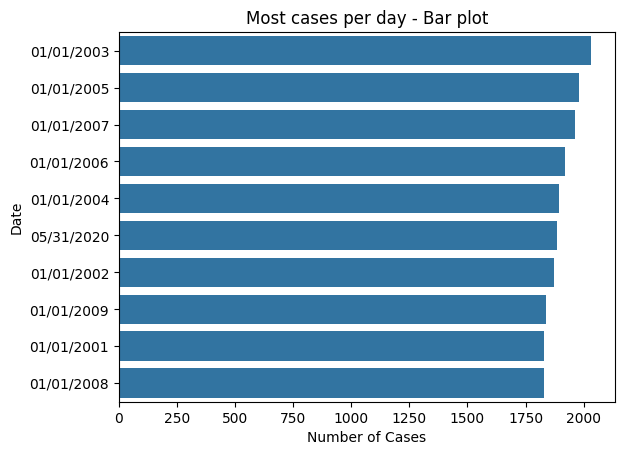

In [46]:
top_10_num_of_cases_each_day_df = pd.DataFrame(top_10_num_of_cases_each_day)
index_df = top_10_num_of_cases_each_day_df.index

sns.barplot(x = index_df , y = 'date' , data = top_10_num_of_cases_each_day_df)
plt.title("Most cases per day - Bar plot")
plt.xlabel("Number of Cases")
plt.ylabel("Date")
plt.show()

Observation: The average Number of cases per day could be more than 550

3. __Number of crime by type__</br>
We try to indentify the trend and highpoints or lowpoints.

In [47]:
# Function to plot the serie value_counts
def plot_counts(serie, title):
    df = pd.DataFrame(serie.value_counts()[:15])
    df.columns = ["Freq"]
    df["Type"] = df.index
    fig = px.bar(df, y="Freq", x="Type", text="Freq", color="Freq", color_continuous_scale=px.colors.sequential.Blugrn)
    fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
    fig.update_layout(title_text=title)
    fig.show()


plot_counts(c_crime_df["Primary Type"], "Type of Crimes")

Observation: THEFT, BATTERY, CRIMINAL DAMAGE and NARCOTICS represents more the 65% of the crimes.

4. __Where does crimes happens the most?__

In [48]:
plot_counts(c_crime_df["Location Description"], "Location of Crimes")

Crime happens mostly on the street

5. __Number of crimes per Year x Months__ </br>
Let's see the number of crimes per Year and Months...

In [49]:
# first we convert the date column to datetime data type.

c_crime_df['Date'] = pd.to_datetime(chicago_crime_df['Date'],format = "%m/%d/%Y %I:%M:%S %p")
c_crime_df.set_index("Date", inplace=True)

In [51]:
cases = pd.DataFrame(c_crime_df.resample("M").size(), columns=["Number of cases"])
cases["Month"] = cases.index.month.astype(str)
cases["Year"] = cases.index.year.astype(str)
cases["Year-Month"] = cases["Year"].str.cat(cases["Month"].str.zfill(2), sep="-")
cases.head()

,Number of cases,Month,Year,Year-Month
Date,,,,
2001-01-31,38122,1,2001,2001-01
2001-02-28,33789,2,2001,2001-02
2001-03-31,40568,3,2001,2001-03
2001-04-30,40091,4,2001,2001-04
2001-05-31,41839,5,2001,2001-05


BY HEATMAP

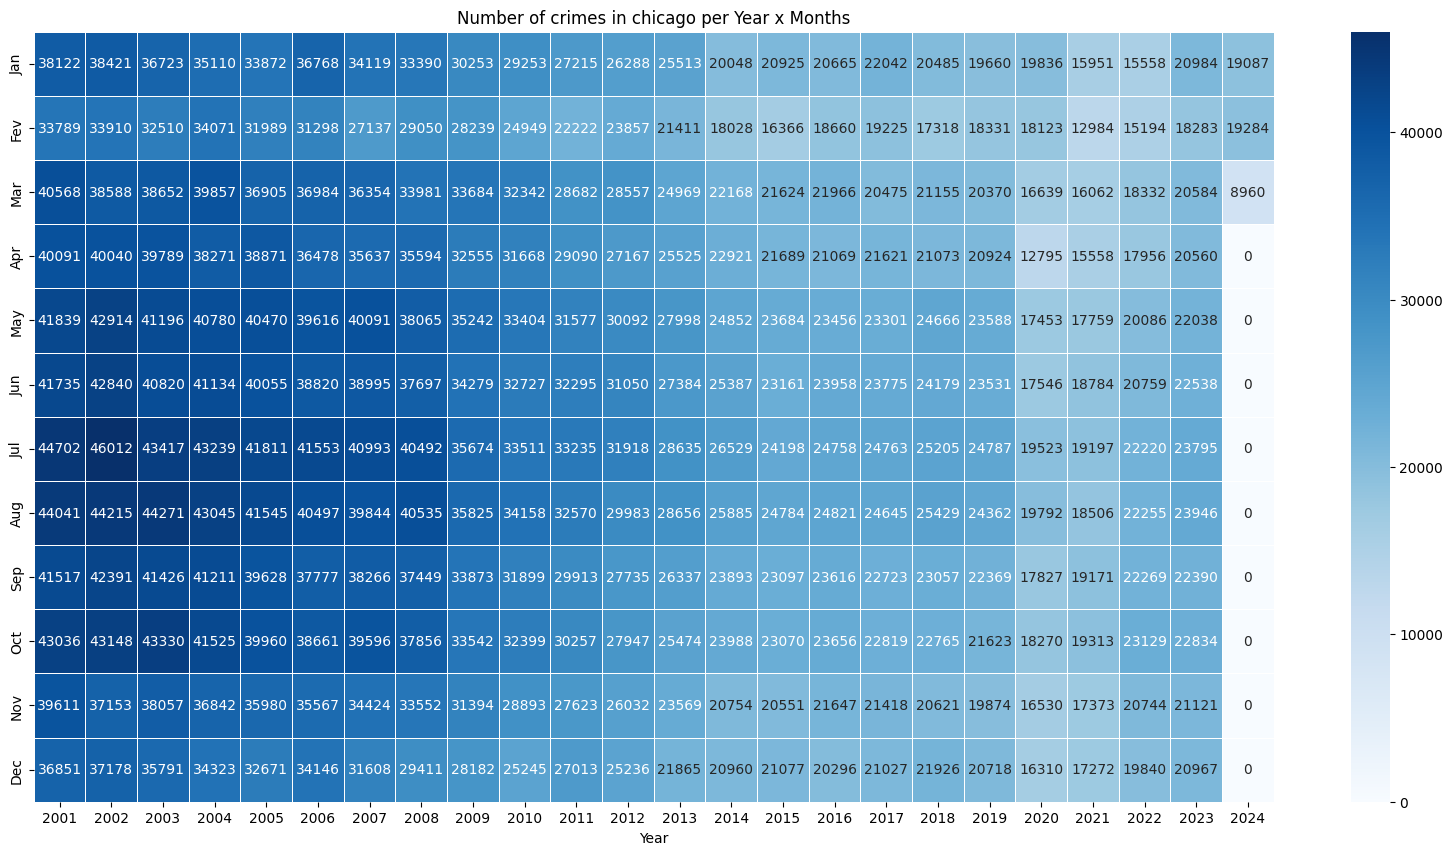

In [52]:
case_table = cases[["Month", "Year", "Number of cases"]]
case_table  = case_table.pivot(index='Month', columns='Year', values='Number of cases').fillna(0).astype(int)
case_table.index = case_table.index.astype(int)
case_table = case_table.sort_index()
case_table.index = ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(20, 10))
_ = sns.heatmap(
    case_table,
    annot=True,
    fmt="d",
    linewidths=0.5,
    cmap="Blues",
).set_title('Number of crimes in chicago per Year x Months')

The years between 2001 and 2012 were a tough time, the year 2008 was the worst with a mean of 71004 crimes per month, and the best year was the 2015 with a mean of 21916 crimes per month.

BY BAR

In [53]:
fig = px.bar(
    cases,
    x="Year-Month",
    y="Number of cases",
    hover_data=["Year", "Month", "Number of cases"],
    color="Number of cases",
    height=600,
    width=1400,
    color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_layout(title_text='Crime counts per year-month in bars')
fig.show()

Similar graph but using bars to visualize though noisy but can be used. Again the 'tough time' during 2001 until 2012.

Are there specific location that crimes used to happen?

Using Map plot

In [54]:
c_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8010584 entries, 2015-03-18 12:00:00 to 2020-03-06 14:00:00
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Primary Type          object 
 2   Location Description  object 
 3   Arrest                bool   
 4   Domestic              bool   
 5   Beat                  int64  
 6   District              string 
 7   Ward                  float64
 8   Year                  int64  
 9   Latitude              float64
 10  Longitude             float64
 11  date                  object 
dtypes: bool(2), float64(3), int64(2), object(4), string(1)
memory usage: 687.6+ MB


In [57]:
map_marks = chicago_crime_df[['Latitude', 'Longitude']]
map_marks['Year'] =  pd.to_datetime(chicago_crime_df.Date, format="%m/%d/%Y %I:%M:%S %p").dt.year
map_marks.head()

<ipython-input-57-a2bb474e3525>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Latitude,Longitude,Year
0,41.877851,-87.627701,2015
1,41.918947,-87.751570,2018
3,41.960005,-87.718496,2018
4,41.706992,-87.655552,2014
5,41.748086,-87.629424,2018


In [58]:
fig = px.scatter_mapbox(map_marks[map_marks.Year == 2016].sample(5000), lat="Latitude", lon="Longitude",
                        color_discrete_sequence=["fuchsia"], zoom=9, height=650)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Look like there is crime everywhere in Chicago, in the centre, you can see more points but also is a crowded place.

What is the arrested rate per crime?

In [59]:
cases = c_crime_df.groupby('Primary Type')['Arrest'].mean().reset_index()
cases['Arrest (%)'] = cases['Arrest'].round(4)*100
cases.sort_values('Arrest', inplace=True)
fig = px.bar(
    cases,
    orientation='h',
    x="Arrest (%)",
    y="Primary Type",
    color="Arrest (%)",
    text="Arrest (%)",
    height=800,
    #width=800,
        color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_traces(texttemplate="%{text:.4s}", textposition="outside")
fig.update_layout(title_text="Arrested Rate in % per Type Crime in Chicago.")

fig.show()

The “VIOLATION” crimes look strongly correlated to the arrested rate once the 'cop' must be present in the location to declare the violation.

In [ ]:
chicago_crime_df.info()

In [ ]:
# Try to find the correlation of the columns

# Select only numeric columns
numeric_columns = chicago_crime_df.select_dtypes(include=['number'])

# Calculate correlation
numeric_columns.corr()

In [ ]:
#plot a heatmap showing correlation
heatmap = sns.heatmap(numeric_columns.corr(), vmin=-1, annot=True)
heatmap.set_title('Chicago Crime Correlation', fontdict={'fontsize':14}, pad=10)

**_Observation_**
1. The Beat and Ward are positively correlated.

In [ ]:
chicago_crime_df.groupby(['Primary Type', 'Arrest','Domestic']).size().sort_values(ascending=False).reset_index().rename(columns={0:'Crime Count'})

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Primary Type', hue='Arrest', data=chicago_crime_df[:8])

# 5. Feature Engineering

Create new columns for Months, Day, and Season

__Creating month column__

In [ ]:
# Create new columns for Months
def extract_and_map_month(date):
    # Ensure Date column have been converted to datetime format
    month_names = chicago_crime_df['Date'].dt.month_name()
# dt is an attribute of the date column object
# month_name() is a method
    return month_names

In [ ]:
chicago_crime_df['Month'] = extract_and_map_month(chicago_crime_df['Date'])

# Group by month and count number of crimes
monthly_crime_counts = chicago_crime_df.groupby('Month').size()

In [ ]:
# Monthly plot for crimes
plt.figure(figsize=(10, 6))
monthly_crime_counts.plot(kind='bar', color='green')
plt.title('Monthly Crime Counts in Chicago')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()

__Creating Day Column__

In [ ]:
# Create new columns for Day
def extract_and_map_month(date):
    # ensure the input is in datetime format
    day_names = chicago_crime_df['Date'].dt.day_name()
# dt is an attribute of the date column object
# month_name() is a method
    return day_names

In [ ]:
chicago_crime_df['Day'] = extract_and_map_month(chicago_crime_df['Date'])

# Group by day and count number of crimes
daily_crime_counts = chicago_crime_df.groupby('Day').size()


In [ ]:
# daily plot for crimes
plt.figure(figsize=(12, 6))
daily_crime_counts.plot(kind='line', color='green', marker='o', markersize=10)
plt.title('Daily Crime Counts in Chicago')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

__Creating Seasons column__

In [ ]:
# Function to define various month and their corresponding season
def get_season(month):
    if month in ['December','January','February']:
        return 'Winter'
    elif month in ['March','April','May']:
        return 'Spring'
    elif month in ['June','July','August']:
        return 'Summer'
    else:
        return 'Fall'

In [ ]:
chicago_crime_df['Season'] = chicago_crime_df['Month'].apply(get_season)

# Group by season and count number of crimes
seasonal_crime_counts = chicago_crime_df.groupby('Season').size()


In [ ]:
# seasonal plot for crimes
plt.figure(figsize=(10, 6))
seasonal_crime_counts.plot(kind='bar', color='green')
plt.title('Seasonal Crime Counts in Chicago')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()

# 6. Frequency Distribution of Crimes

 __Monthly Crime Frequency__

In [ ]:
# created another df where the Date would be the Index
crimes_df = chicago_crime_df.set_index(['Date'])

In [ ]:
# show a trend analysis of arrest over years, months and days
plt.subplot()
#plt.figure(figsize=(8, 6))

# this gives us data where arrest was made
arrests = crimes_df[crimes_df['Arrest'] == True]['Arrest']

#yearly arrest
arrests.resample('YE').count().plot() #the 'A' is an offset Data that indicates annual, view documentation for further understanding
plt.title('Yearly arrests')
plt.show()

# quarter start arrest
arrests.resample('QS').count().plot()
plt.title('Quarterly Arrests')
plt.show()

# monthly arrest
arrests.resample('ME').count().plot()
plt.title('Monthly Arrests')
plt.show()



__Observation__
1. There is a downward trend of arrest over the years from 2008 upwards this is evident even in the quarterly arrests.
2. 2020 recorded the least monthly arrest.

In [ ]:
crime_count_by_month = chicago_crime_df.groupby('Month')['Arrest'].count()
print(crime_count_by_month)

__Seasonal Crime Frequency__

In [ ]:
crime_count_by_season = chicago_crime_df.groupby('Season')['Season'].count()
crime_count_by_season

In [ ]:
# Group by season and count number of arrests
seasonal_arrests = chicago_crime_df[chicago_crime_df['Arrest'] == True]['Season'].value_counts()

# Plot pie chart for seasonal arrests
plt.figure(figsize=(8, 6))
seasonal_arrests.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Seasonal Arrests in Chicago')
plt.ylabel('')
plt.show()

 __Daily Crime Frequency__

In [ ]:
crime_count_per_day = chicago_crime_df.groupby('Day')['Day'].count()
print(crime_count_per_day)

In [ ]:
# This will suppress any warnings related to the change in figure layout.
import warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

# Frequency of arrests for each day
sns.catplot(
    data=chicago_crime_df, y="Day", hue="Arrest", kind="count",
    palette="pastel", legend=True, edgecolor=".6",
)

In [ ]:
#Location with the most crime

chicago_crime_df.groupby('Location Description')['Primary Type'].size().sort_values(ascending=False).head(20)

# 7. Visualize Data Distribution

In [ ]:
# Visualize the distribution of crime types
plt.figure(figsize=(12, 6))
sns.countplot(data=chicago_crime_df, x='Primary Type')
plt.xticks(rotation=90)
plt.title('Distribution of Crime Types')

# 8. Investigate Relationships

In [ ]:
numeric_columns.corr()

In [ ]:
heatmap = sns.heatmap(numeric_columns.corr(), vmin=-1, annot=True)
heatmap.set_title('Chicago Crime Correlation', fontdict={'fontsize':14}, pad=10)

# i can infer the relationship between the districts and the ward

In [ ]:
crimes_df.head()

In [ ]:
# Investigate Relationships
# Explore the relationship between Location description and crime type

# Create a cross-tabulation of crime location and crime type
crime_location_type = pd.crosstab(chicago_crime_df['Location Description'], chicago_crime_df['Primary Type'])

# Plot heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(crime_location_type, cmap='YlGnBu', linewidths=.1)
plt.title('Frequency of Crime Types at Different Locations')
plt.xlabel('Crime Type')
plt.ylabel('Location Description')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# 8. Examine Crime Locations

In [ ]:
# Location description where crime happens the most
most_common_crime_location = chicago_crime_df['Location Description'].value_counts().idxmax()

In [ ]:
most_common_crime_location

# 9. Identify Hotspots

In [ ]:
# using district to determine areas with higest crime rate(True/False)

# Calculate total number of arrests for each district
district_arrests = chicago_crime_df.groupby('District')['Arrest'].sum()
# print(district_arrests)

# Determine the districts with the highest arrest rates
highest_arrest_rate_districts = district_arrests.nlargest(5)  # Get the top 5 districts with highest arrest rates

# print(highest_arrest_rate_districts)

# Create a boolean column indicating whether each district has one of the highest arrest rates
chicago_crime_df['Highest_Arrest_Rate'] = chicago_crime_df['District'].isin(highest_arrest_rate_districts.index)

# Print the result (True/False) for each district
print(chicago_crime_df[['District', 'Highest_Arrest_Rate']].drop_duplicates())


# using district to determine areas with higest crime rate(True)


# 11. Compare Crime Rates

In [ ]:
# mapping crimes based on locations

# Filter out rows with missing latitude or longitude values
chicago_crime_df = chicago_crime_df.dropna(subset=['Latitude', 'Longitude'])

# Create a map centered around the mean latitude and longitude
crime_map = folium.Map(location=[chicago_crime_df['Latitude'].mean(), chicago_crime_df['Longitude'].mean()], zoom_start=11)

# Add markers for each crime location
for index, row in chicago_crime_df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Primary Type']).add_to(crime_map)

# Save the map to an HTML file
crime_map.save('crime_map.html')

# 12. Summarize and Visualize Insights